
# **Dataset Overview**

#### Columns:

1.  **gender**: The gender of the student.
    
    -   **Categories**:
        -   `male`
        -   `female`
2.  **race/ethnicity**: The group the student belongs to, classified by ethnicity.
    
    -   **Categories**:
        -   `group A`
        -   `group B`
        -   `group C`
        -   `group D`
        -   `group E`
3.  **parental level of education**: The highest level of education attained by the student's parents.
    
    -   **Categories**:
        -   `high school`
        -   `some high school`
        -   `associate's degree`
        -   `some college`
        -   `bachelor's degree`
        -   `master's degree`
4.  **lunch**: The type of lunch the student receives.
    
    -   **Categories**:
        -   `standard` (likely regular lunch)
        -   `free/reduced` (likely referring to free or reduced-price lunch programs)
5.  **test preparation course**: Whether the student has completed a test preparation course.
    
    -   **Categories**:
        -   `none` (no course completed)
        -   `completed` (course taken)
6.  **math score**: The student's score on the math test.
    
    -   **Numeric value**: A score ranging from 0 to 100.
7.  **reading score**: The student's score on the reading test.
    
    -   **Numeric value**: A score ranging from 0 to 100.
8.  **writing score**: The student's score on the writing test.
    
    -   **Numeric value**: A score ranging from 0 to 100.

----------

### **Target Variable**

-   **Target Variable**: The target variable can be one or more of the **test scores** (`math score`, `reading score`, or `writing score`). These scores represent the dependent variables that you may want to predict based on the other features (independent variables) such as `gender`, `race/ethnicity`, `lunch`, etc.

# EDA

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("./Datasets/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [102]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [104]:
df.shape

(1000, 8)

In [105]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [106]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [107]:
# Change the strings to integers (as categories)

df['gender']  = df['gender'].map({'male' : 0, 'female' : 1})
# Mapping for 'parental level of education'
education_mapping = {
    "bachelor's degree": 0,
    "some college": 1,
    "master's degree": 2,
    "associate's degree": 3,
    "high school": 4,
    "some high school": 5
}

# Mapping for 'race/ethnicity'
race_mapping = {
    "group B": 0,
    "group C": 1,
    "group A": 2,
    "group D": 3,
    "group E": 4
}

# Applying the mappings using .map()
df['parental level of education'] = df['parental level of education'].map(education_mapping)
df['race/ethnicity'] = df['race/ethnicity'].map(race_mapping)

df['lunch'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})


In [108]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,0,0,0,72,72,74
1,1,1,1,0,1,69,90,88
2,1,0,2,0,0,90,95,93
3,0,2,3,1,0,47,57,44
4,0,1,1,0,0,76,78,75


In [109]:
df_norm.isnull().sum()

gender                           0
race/ethnicity                 140
parental level of education    222
lunch                            0
test preparation course          0
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [110]:
corr_matrix = df.corr()
corr_matrix

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.057964,-0.028383,0.021372,-0.006028,-0.167982,0.244313,0.301225
race/ethnicity,-0.057964,1.000000,-0.063602,-0.029391,0.007928,0.193592,0.100930,0.119756
parental level of education,-0.028383,-0.063602,1.000000,-0.014378,0.011558,-0.139236,-0.143429,-0.192338
lunch,0.021372,-0.029391,-0.014378,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test preparation course,-0.006028,0.007928,0.011558,0.017044,1.000000,0.177702,0.241780,0.312946
math score,-0.167982,0.193592,-0.139236,-0.350877,0.177702,1.000000,0.817580,0.802642
reading score,0.244313,0.100930,-0.143429,-0.229560,0.241780,0.817580,1.000000,0.954598
writing score,0.301225,0.119756,-0.192338,-0.245769,0.312946,0.802642,0.954598,1.000000


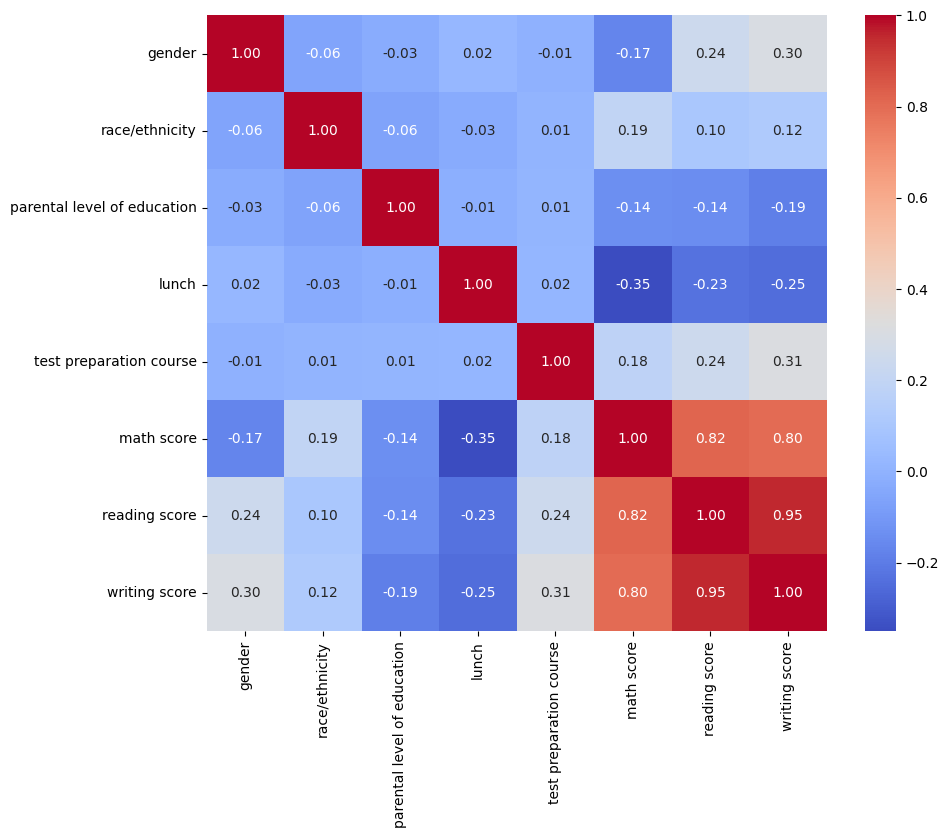

In [111]:
#Heatmap

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt='.2f')
plt.show()


### Key Insights:

1.  **Scores Correlations**:
    
    -   **Math Score ↔ Reading Score (0.82)**: There's a **strong positive correlation** between math and reading scores. This suggests that students who perform well in math tend to perform well in reading, and vice versa.
    -   **Math Score ↔ Writing Score (0.80)**: Math and writing scores also show a strong positive correlation, meaning students with higher math scores tend to have higher writing scores.
    -   **Reading Score ↔ Writing Score (0.95)**: The highest correlation is between reading and writing scores. This shows an even stronger positive relationship, implying that students who score well in reading are highly likely to score well in writing.
2.  **Non-Score Variables**:
    
    -   **Gender**: There are **low correlations** between gender and most other variables, suggesting that gender is not strongly related to academic performance in this dataset. For example, gender has very weak correlations with scores and other factors.
    -   **Race/Ethnicity**: Similar to gender, race/ethnicity has **very weak correlations** with the scores, with a slightly higher correlation between race and reading score (0.12), but still not strong enough to infer a meaningful relationship.
    -   **Parental Level of Education**: There is a **weak positive correlation** between parental education level and scores, particularly math (0.17), reading (0.19), and writing (0.25). This suggests that students with parents who have higher education levels tend to score slightly better, though the relationship is not very strong.
    -   **Lunch**: There is a **negative correlation** between lunch type (whether the student gets a free/reduced lunch) and scores. The most notable is the negative correlation between lunch and math scores (-0.35), reading (-0.23), and writing (-0.25). This suggests that students receiving free or reduced lunch tend to have lower scores, which could indicate socio-economic factors impacting performance. However, this is a moderate negative correlation, not a very strong one.
**Test Preparation Course**:

-   The **test preparation course** shows a **moderate positive correlation** with all the scores, particularly writing (0.31). Students who completed the test preparation course tend to score higher, especially in writing, but the correlations are not exceptionally high. This suggests that while the test preparation course may help students improve their scores, the effect is moderate, not drastic.

# 5. OUTLIER REMOVAL:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


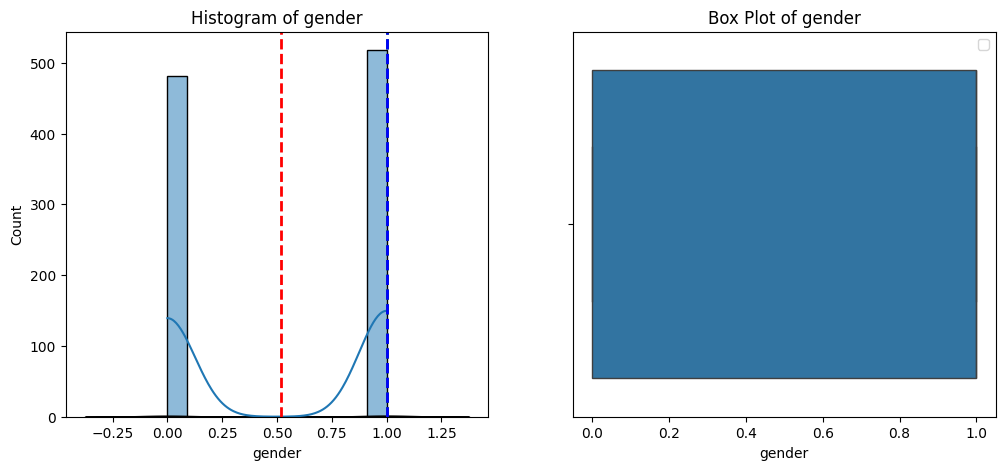

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


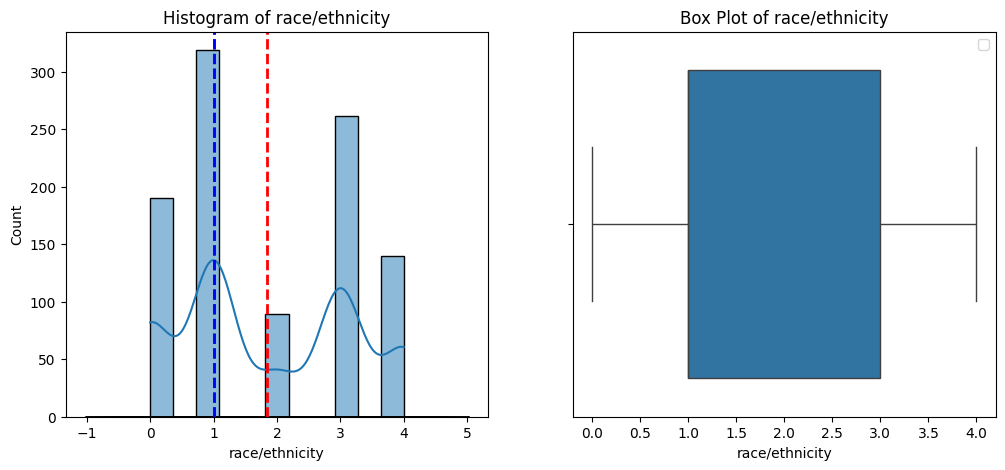

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


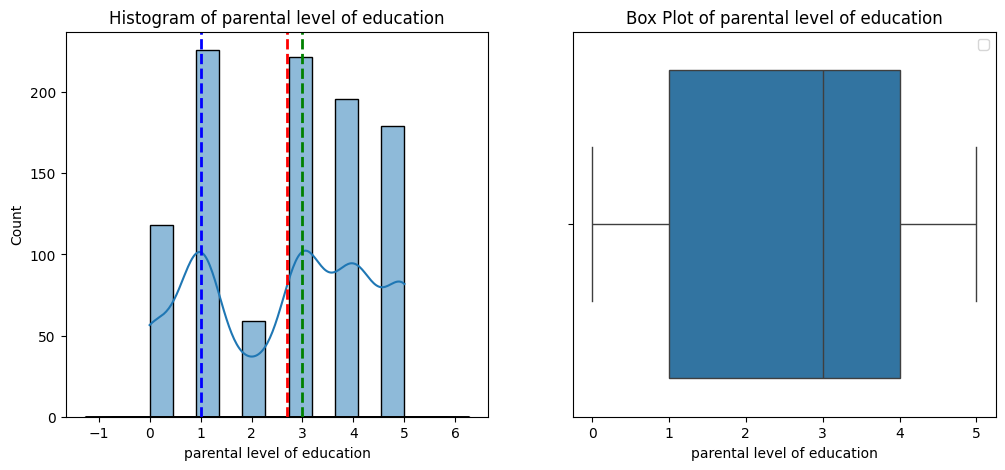

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


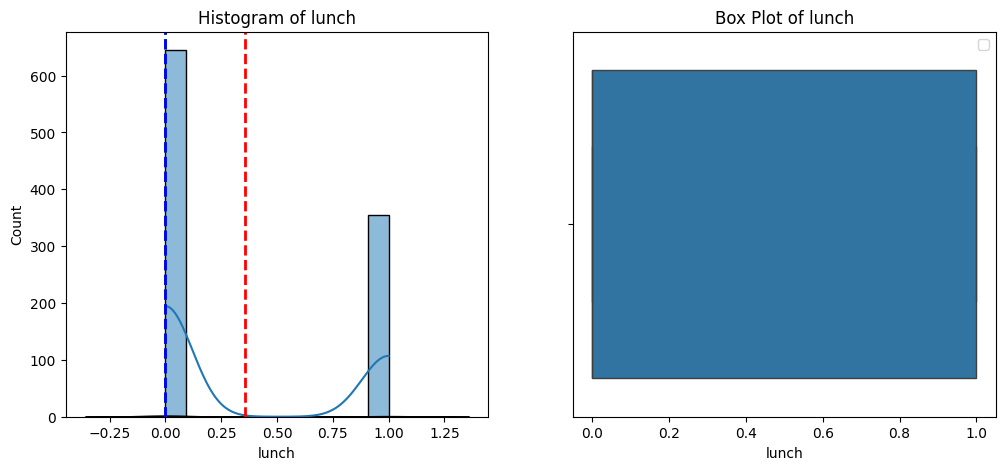

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


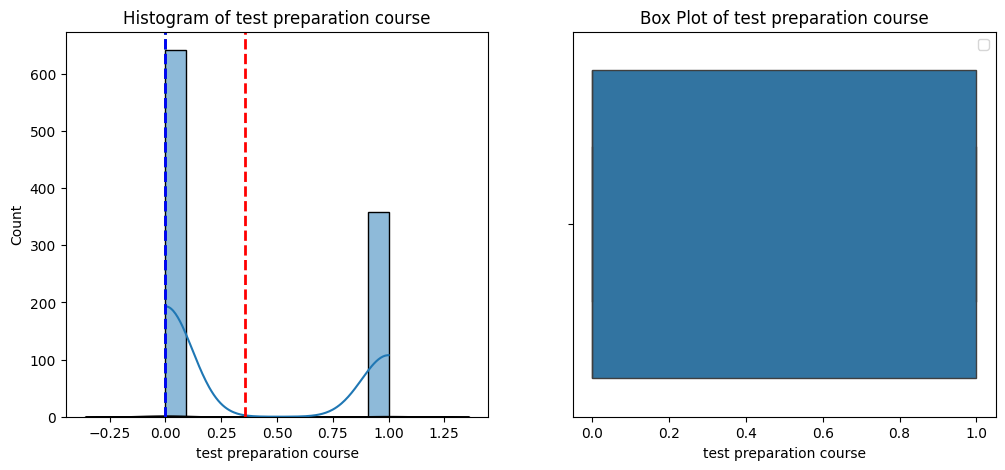

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


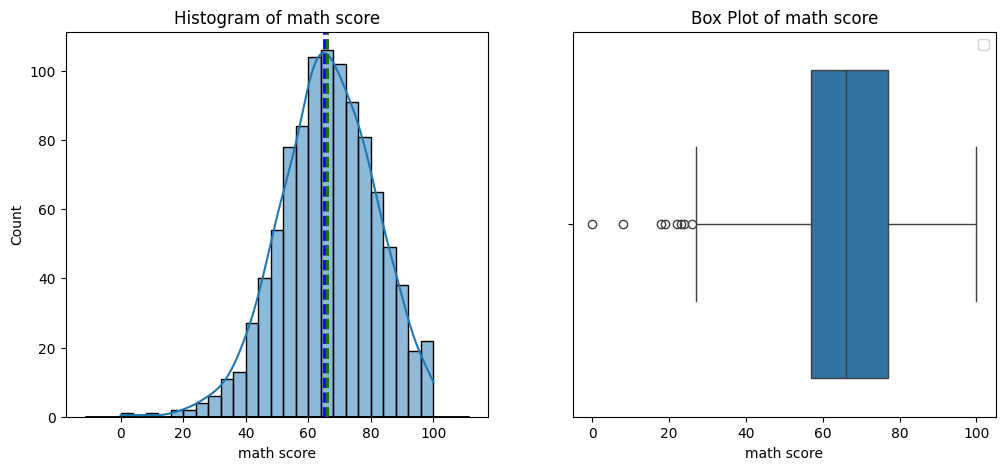

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


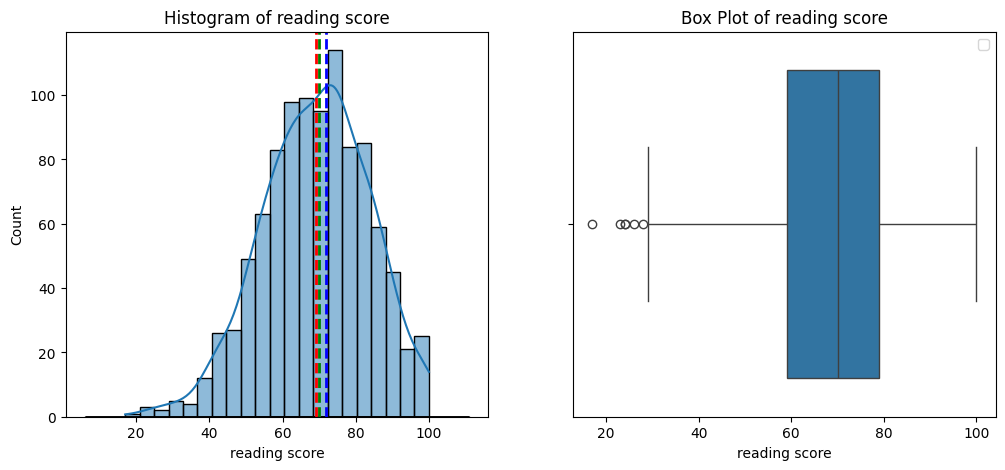

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


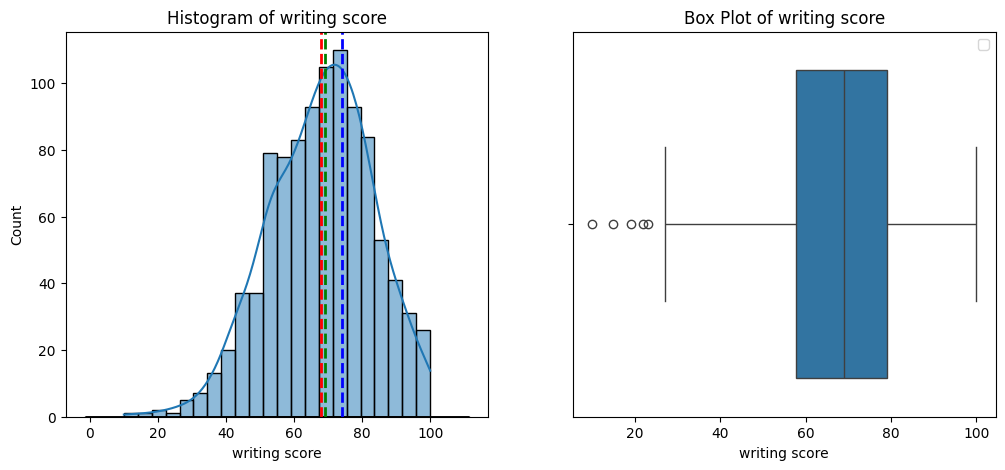

In [112]:
def plot_distributions(df):
    for col in df.columns:

        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0]

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        sns.kdeplot(df[col], fill=True, color='black')
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(median, color='green', linestyle='dashed',
                    linewidth=2, label='Median')
        plt.axvline(mode, color='blue', linestyle='dashed',
                    linewidth=2, label='Mode')
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')

        plt.legend()
        
        plt.show()

plot_distributions(df)

In [113]:
def remove_outliers():
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        u = Q3 + 1.5 * IQR 
        l  = Q1 - 1.5 * IQR

        df[col] = np.clip(df[col], u,l)
    return df

df = remove_outliers()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


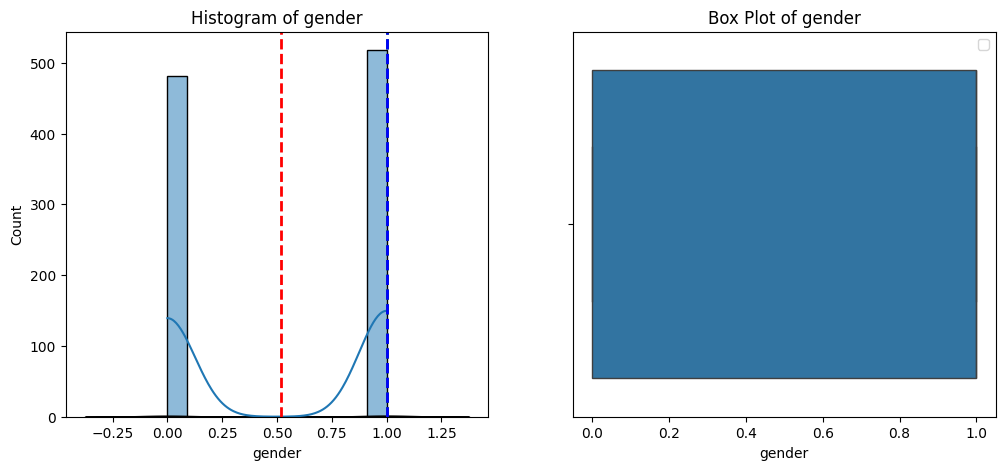

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


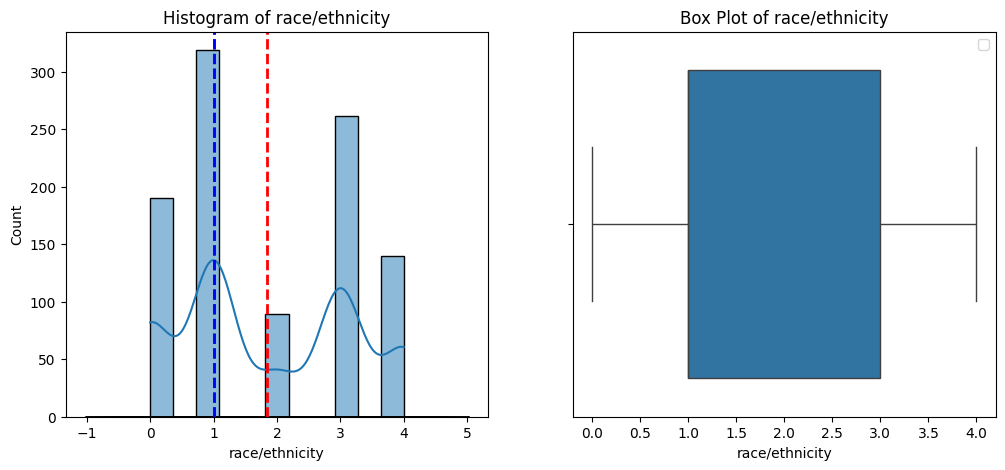

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


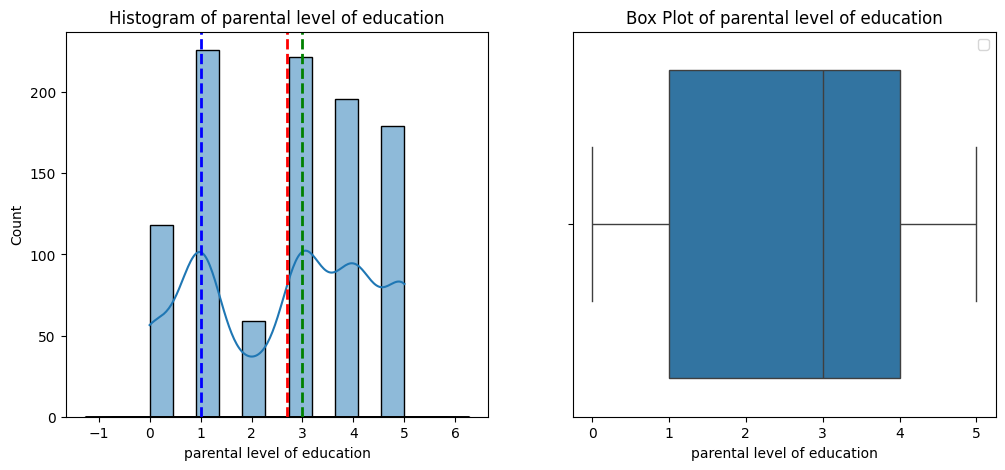

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


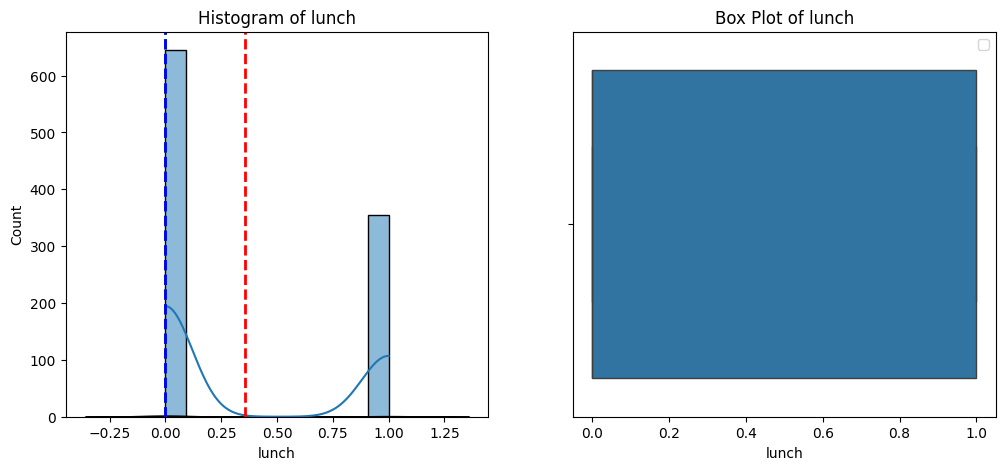

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


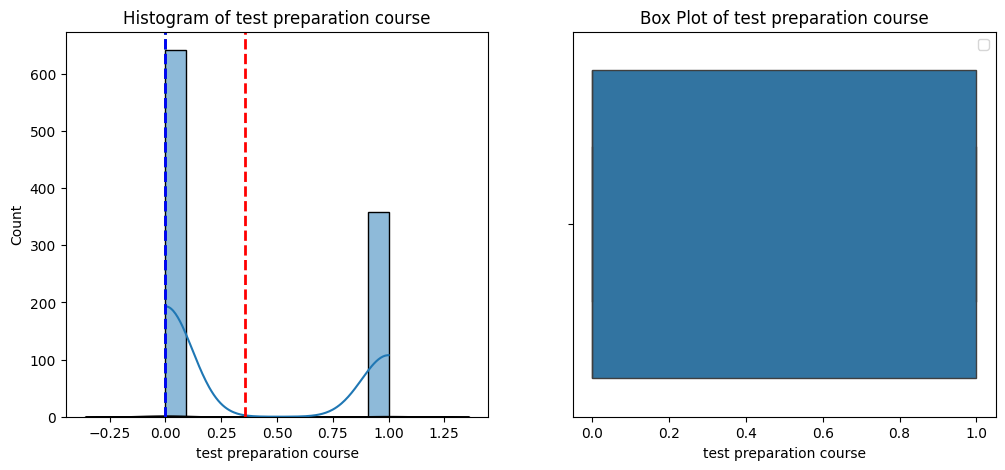

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


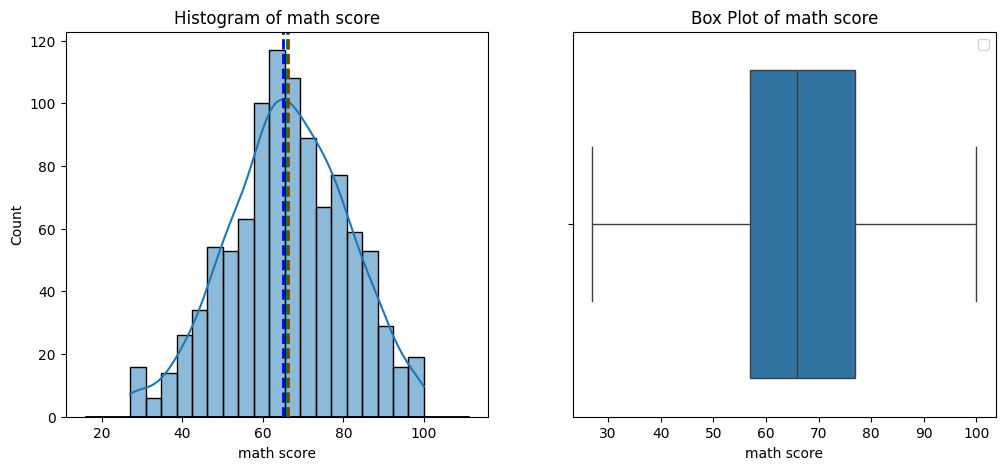

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


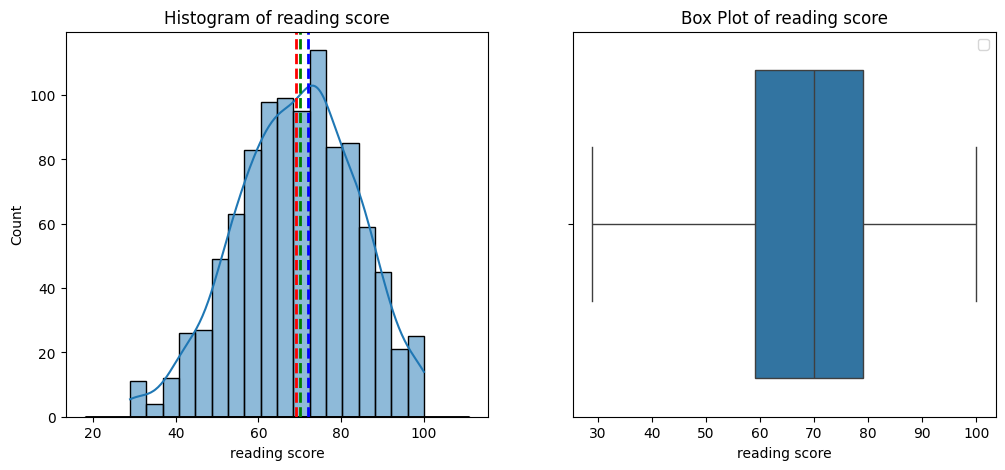

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


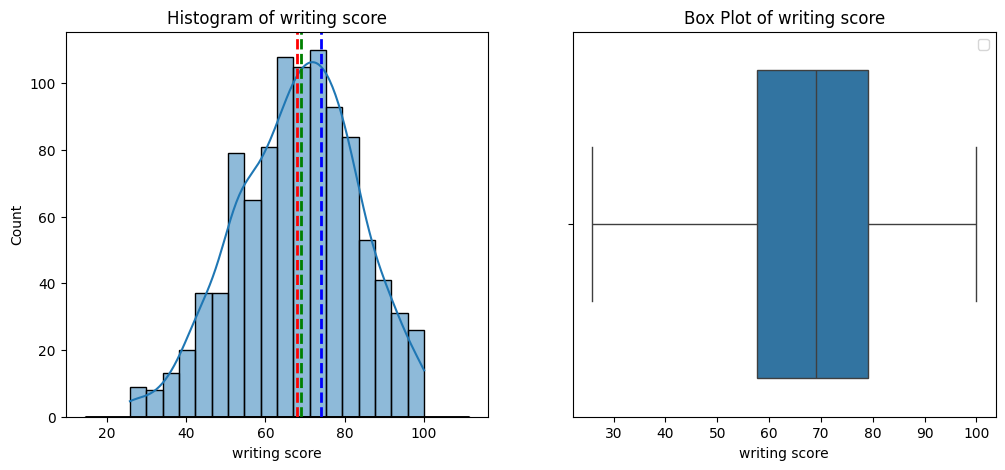

In [114]:
plot_distributions(df)

### Frequency Distribution

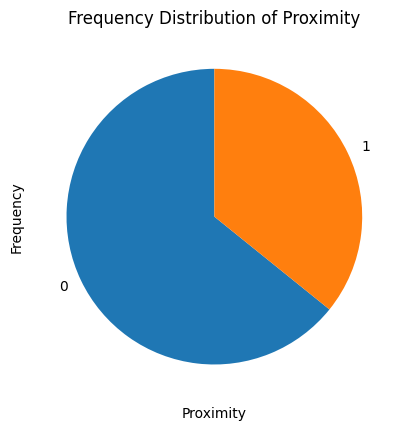

In [115]:
freq = df['test preparation course'].value_counts()
freq

freq.plot(kind='pie', startangle=90)
plt.title('Frequency Distribution of Proximity')
plt.xlabel('Proximity')
plt.ylabel('Frequency')
plt.show()

# Normalization

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# data = df.to_numpy()
normalized_data = scaler.fit_transform(df)
df_norm = pd.DataFrame(normalized_data, columns = df.columns)
df_norm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.964625,-1.345452,-1.595550,-0.741881,-0.746748,0.391218,0.193085,0.392118
1,0.964625,-0.615418,-1.002188,-0.741881,1.339140,0.190078,1.434787,1.321682
2,0.964625,-1.345452,-0.408826,-0.741881,-0.746748,1.598061,1.779704,1.653669
3,-1.036672,0.114615,0.184535,1.347925,-0.746748,-1.284952,-0.841667,-1.599804
4,-1.036672,-0.615418,-1.002188,-0.741881,-0.746748,0.659405,0.606986,0.458515


In [117]:
df_norm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.964625,-1.345452,-1.595550,-0.741881,-0.746748,0.391218,0.193085,0.392118
1,0.964625,-0.615418,-1.002188,-0.741881,1.339140,0.190078,1.434787,1.321682
2,0.964625,-1.345452,-0.408826,-0.741881,-0.746748,1.598061,1.779704,1.653669
3,-1.036672,0.114615,0.184535,1.347925,-0.746748,-1.284952,-0.841667,-1.599804
4,-1.036672,-0.615418,-1.002188,-0.741881,-0.746748,0.659405,0.606986,0.458515


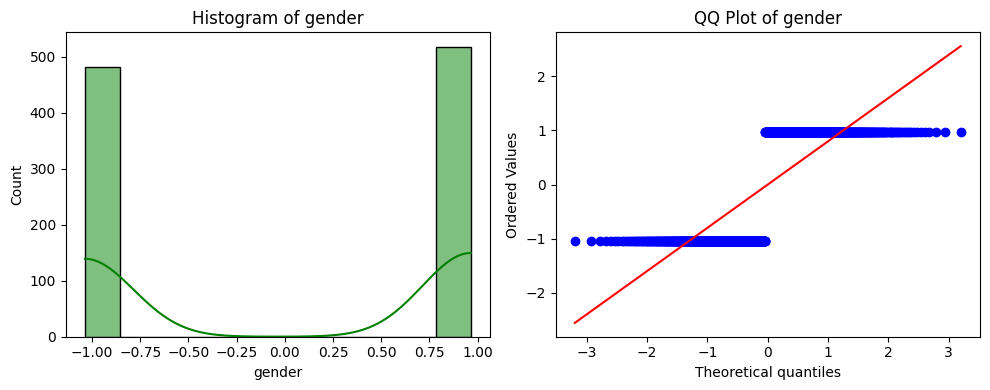

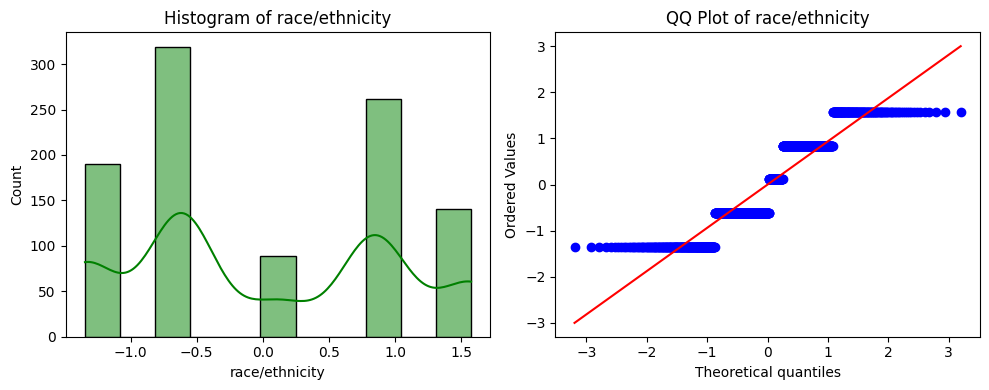

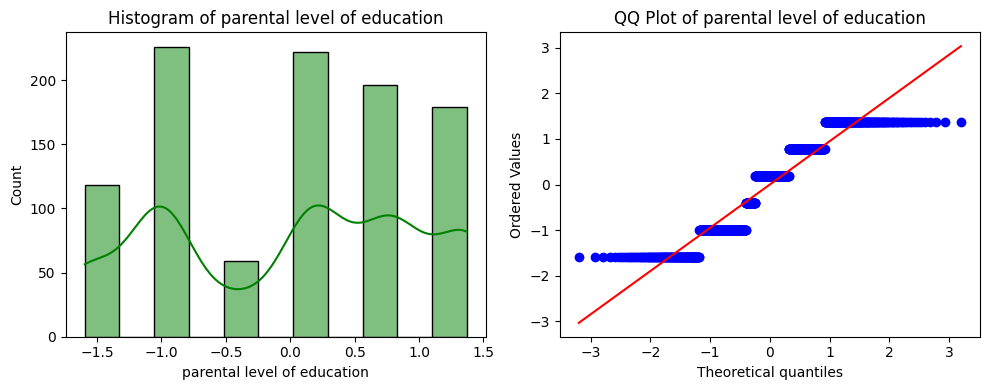

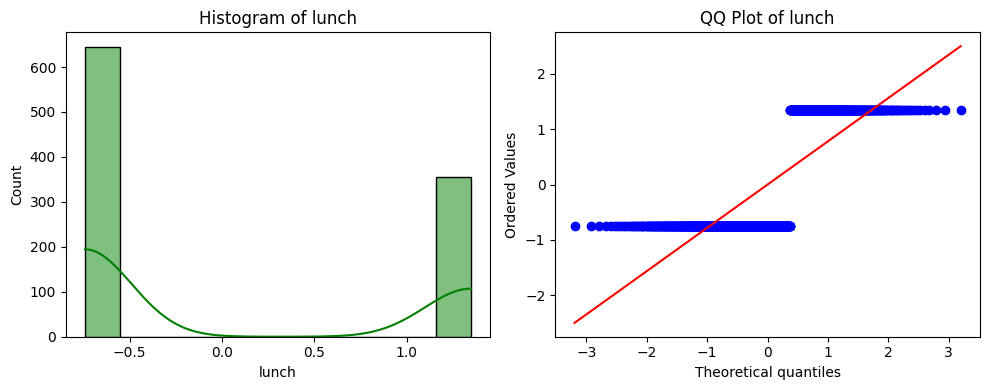

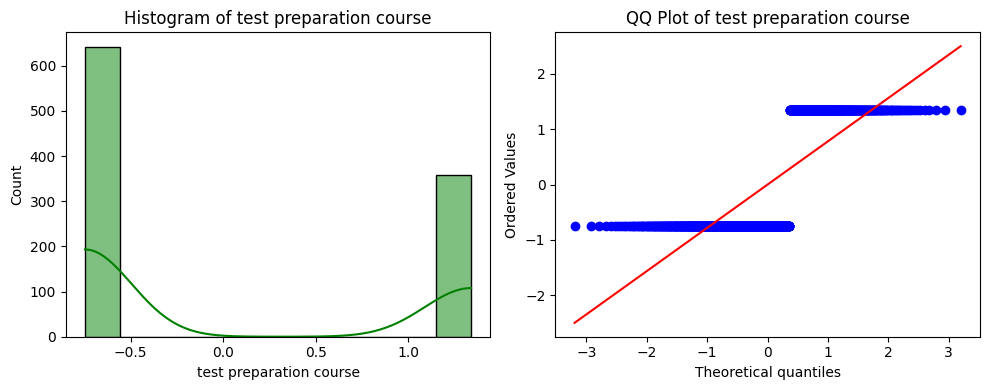

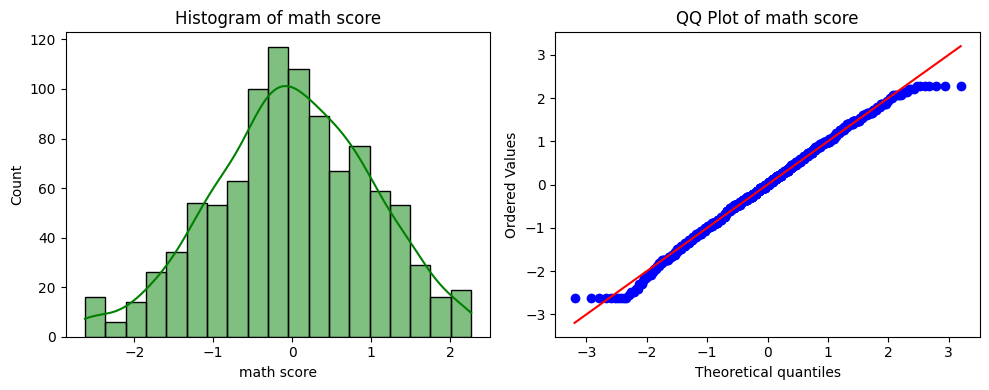

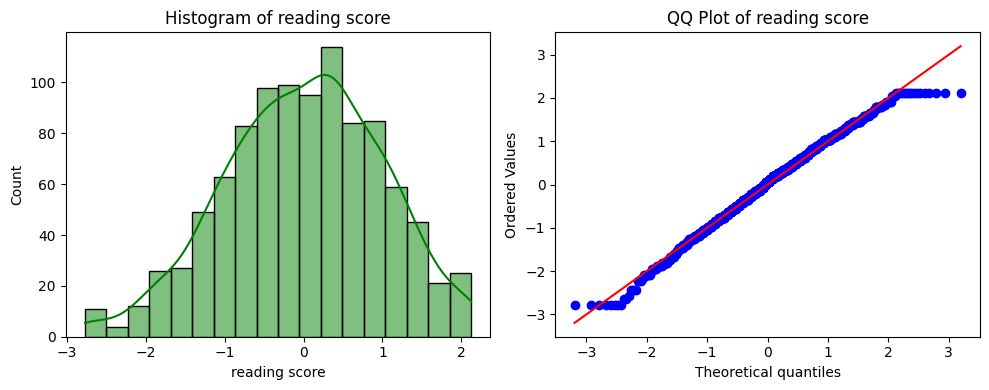

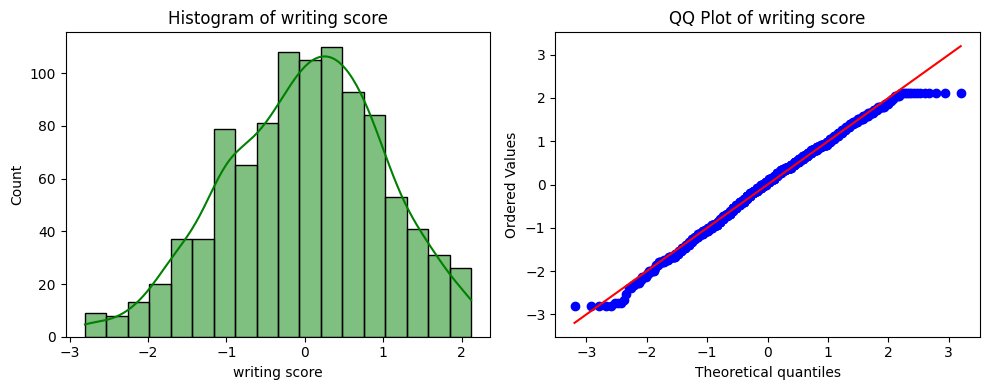

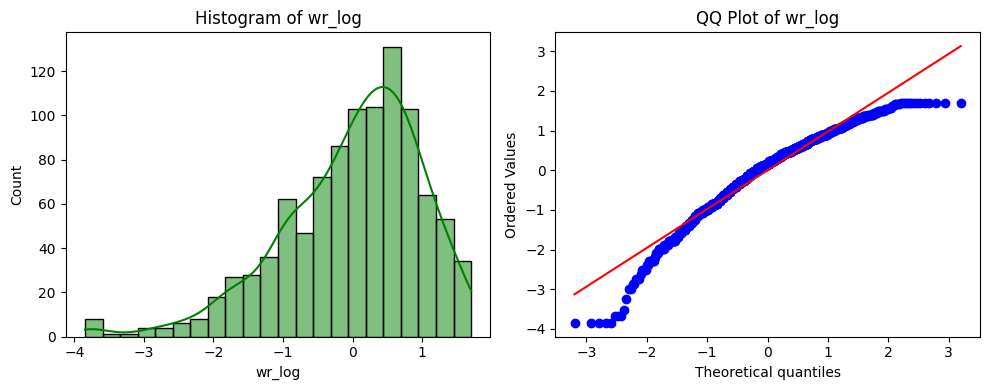

In [128]:
import scipy.stats as stat

def graphical_norm_check(df=df):
    for col in df_norm.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(kde=True, data = df_norm[col], color='green')
        plt.title(f"Histogram of {col}")

        plt.subplot(1,2,2)
        stat.probplot(df_norm[col], dist="norm", plot=plt)
        plt.title(f'QQ Plot of {col}')
    
        plt.tight_layout()
        plt.show()

graphical_norm_check()

## Tests


### **Shapiro-Wilk Test**:

The **Shapiro-Wilk test** is a statistical test that checks if the data is normally distributed. The null hypothesis is that the data follows a normal distribution.

-   **Statistic**: Measures how much the data deviates from a normal distribution. A value closer to 1 indicates that the data is more likely to be normal.
-   **p-value**: If the p-value is **greater** than a significance level (typically 0.05), you **fail to reject** the null hypothesis (i.e., the data is normally distributed). If the p-value is **less than** 0.05, you **reject** the null hypothesis (i.e., the data is not normally distributed).

----------

### **Kolmogorov-Smirnov Test**:

The **Kolmogorov-Smirnov test** compares the sample distribution to a reference distribution (normal distribution in this case). It also has a null hypothesis that the data follows the specified reference distribution.

-   **Statistic**: Measures the largest deviation between the sample distribution and the normal distribution.
-   **p-value**: Similar to the Shapiro-Wilk test, if the p-value is **greater** than 0.05, you fail to reject the null hypothesis.

In [129]:
from scipy.stats import kstest, shapiro

def analytical_norm_test(df=df):
    for col in df_norm.columns:
        print(f"Normality test results for {col}:")

        #shapiro_test
        shapiro_test = shapiro(df_norm[col])
        print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

        #kstest
        ks_test = kstest(df_norm[col], 'norm')
        print(f"Kolmogorov-Smirnov test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

        print()


analytical_norm_test()

Normality test results for gender:
Shapiro-Wilk test: Statistic=0.6361194418031052, p-value=1.3171533658626982e-41
Kolmogorov-Smirnov test: Statistic=0.35063373364357187, p-value=2.023721714975937e-110

Normality test results for race/ethnicity:
Shapiro-Wilk test: Statistic=0.8725692414468057, p-value=8.635835593586129e-28
Kolmogorov-Smirnov test: Statistic=0.23986080482095373, p-value=4.071624789492042e-51

Normality test results for parental level of education:
Shapiro-Wilk test: Statistic=0.8938892462037301, p-value=1.1193036704787153e-25
Kolmogorov-Smirnov test: Statistic=0.1858735708971434, p-value=1.0228803187962328e-30

Normality test results for lunch:
Shapiro-Wilk test: Statistic=0.6052678033954566, p-value=8.437249052097558e-43
Kolmogorov-Smirnov test: Statistic=0.4159203172493881, p-value=3.713716898082597e-157

Normality test results for test preparation course:
Shapiro-Wilk test: Statistic=0.6065810359172238, p-value=9.449622356762233e-43
Kolmogorov-Smirnov test: Statistic

## Transformation

In [130]:
from scipy.stats import boxcox

df['wr_log'] = np.log1p(df['writing score'])

def feature_scale():
    scaler = StandardScaler()
    # data = df.to_numpy()
    normalized_data = scaler.fit_transform(df)
    df_norm = pd.DataFrame(normalized_data, columns = df.columns)
    return df_norm

df_norm = feature_scale()
df_norm.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,wr_log
0,0.964625,-1.345452,-1.595550,-0.741881,-0.746748,0.391218,0.193085,0.392118,0.454913
1,0.964625,-0.615418,-1.002188,-0.741881,1.339140,0.190078,1.434787,1.321682,1.172112
2,0.964625,-1.345452,-0.408826,-0.741881,-0.746748,1.598061,1.779704,1.653669,1.401158
3,-1.036672,0.114615,0.184535,1.347925,-0.746748,-1.284952,-0.841667,-1.599804,-1.685708
4,-1.036672,-0.615418,-1.002188,-0.741881,-0.746748,0.659405,0.606986,0.458515,0.510417


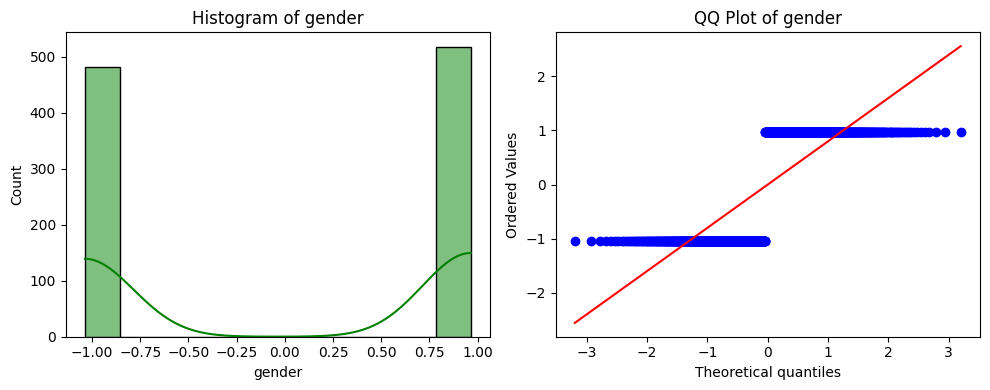

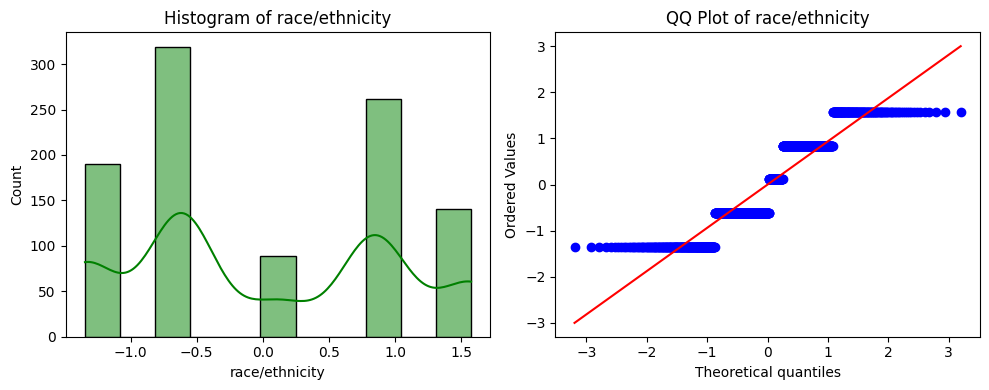

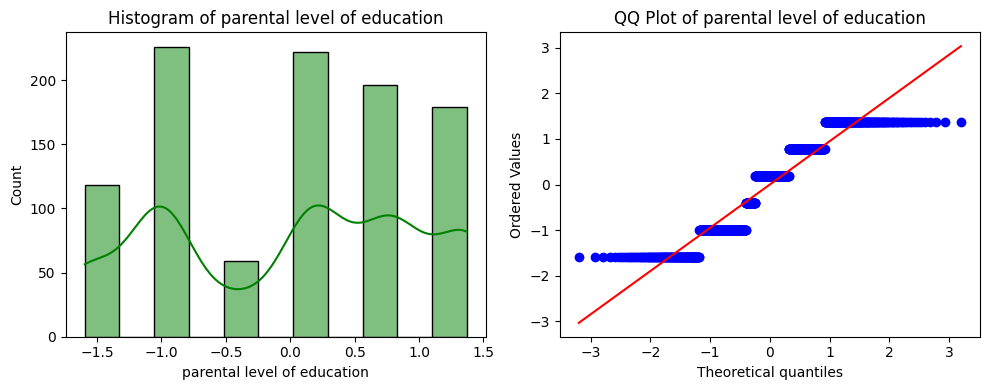

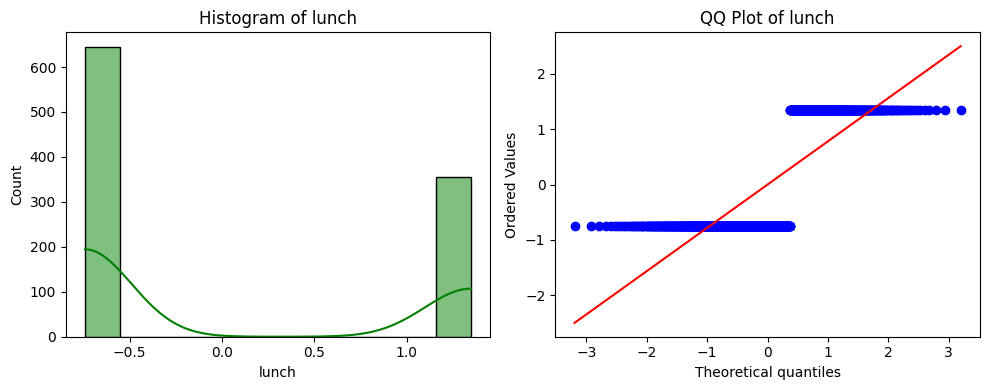

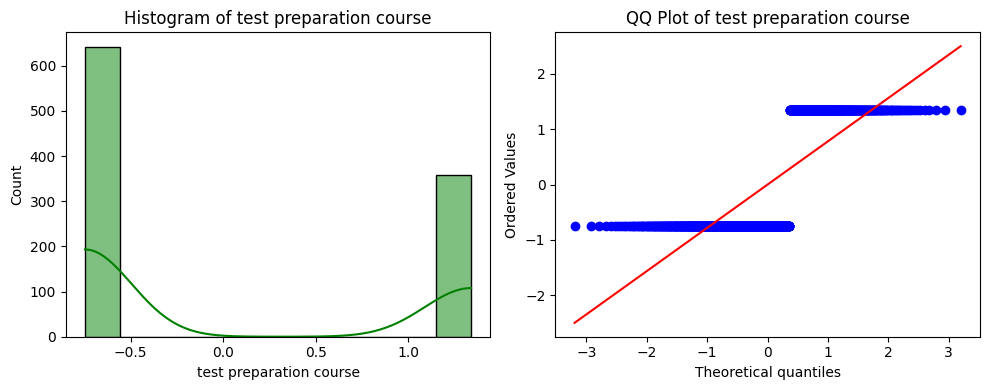

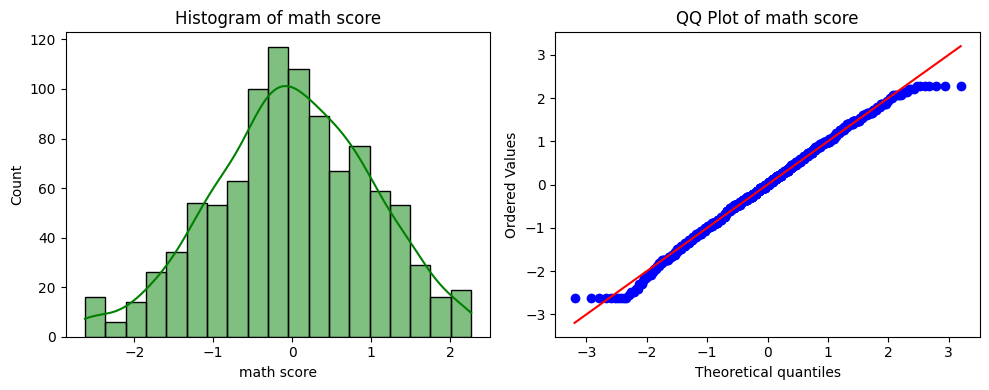

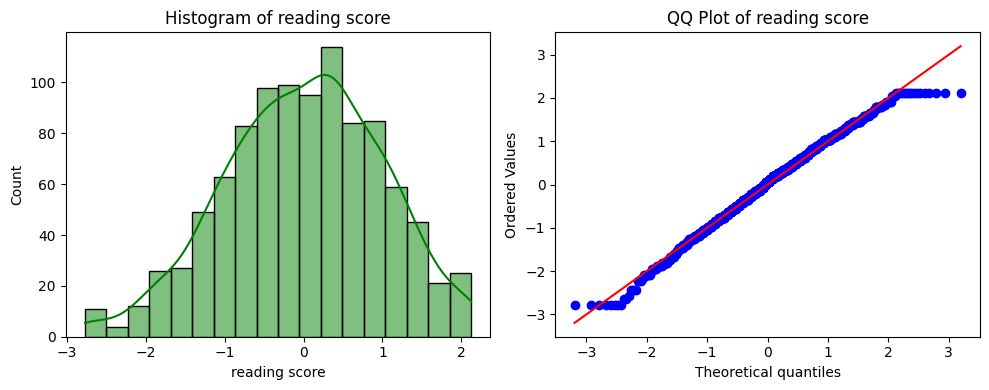

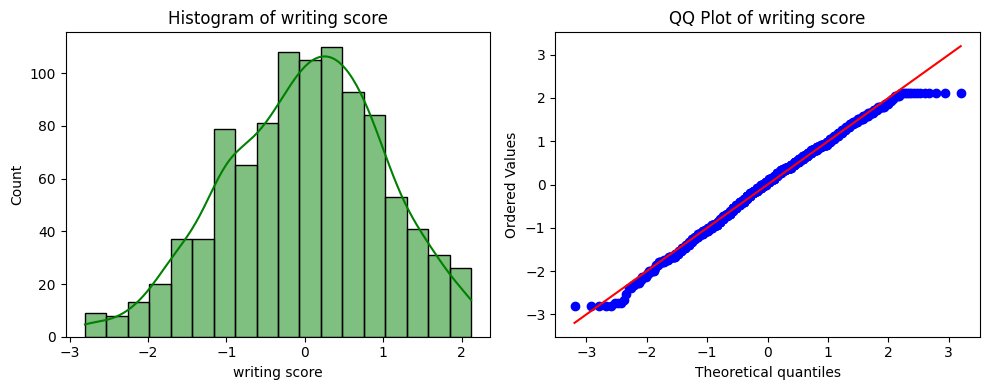

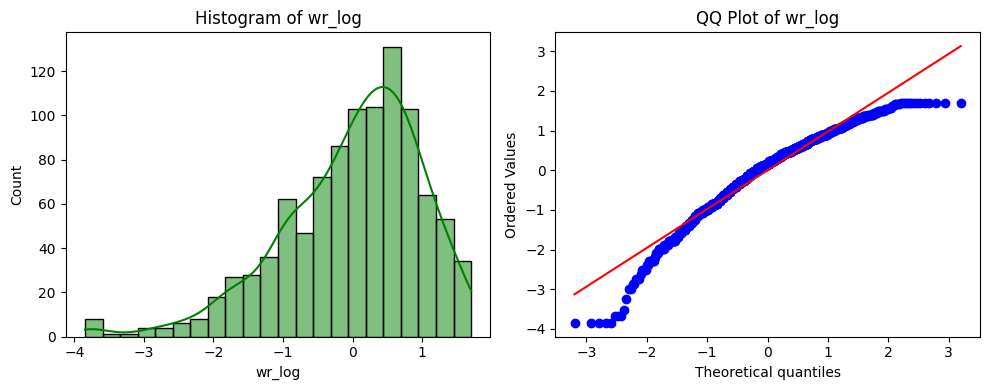

Normality test results for gender:
Shapiro-Wilk test: Statistic=0.6361194418031052, p-value=1.3171533658626982e-41
Kolmogorov-Smirnov test: Statistic=0.35063373364357187, p-value=2.023721714975937e-110

Normality test results for race/ethnicity:
Shapiro-Wilk test: Statistic=0.8725692414468057, p-value=8.635835593586129e-28
Kolmogorov-Smirnov test: Statistic=0.23986080482095373, p-value=4.071624789492042e-51

Normality test results for parental level of education:
Shapiro-Wilk test: Statistic=0.8938892462037301, p-value=1.1193036704787153e-25
Kolmogorov-Smirnov test: Statistic=0.1858735708971434, p-value=1.0228803187962328e-30

Normality test results for lunch:
Shapiro-Wilk test: Statistic=0.6052678033954566, p-value=8.437249052097558e-43
Kolmogorov-Smirnov test: Statistic=0.4159203172493881, p-value=3.713716898082597e-157

Normality test results for test preparation course:
Shapiro-Wilk test: Statistic=0.6065810359172238, p-value=9.449622356762233e-43
Kolmogorov-Smirnov test: Statistic

In [131]:
graphical_norm_check()
analytical_norm_test()

In [132]:
## Not normalized well using log and boxcox

In [133]:
# Z-score Normalization
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

# Apply normalization to each column
df_norm_2 = df.apply(zscore_normalize)

print("Z-score Normalized Data:\n")
df_norm_2

Z-score Normalized Data:



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,wr_log
0,0.964143,-1.344779,-1.594752,-0.741510,-0.746374,0.391023,0.192988,0.391922,0.454685
1,0.964143,-0.615111,-1.001687,-0.741510,1.338470,0.189983,1.434070,1.321021,1.171526
2,0.964143,-1.344779,-0.408622,-0.741510,-0.746374,1.597262,1.778814,1.652842,1.400458
3,-1.036154,0.114558,0.184443,1.347251,-0.746374,-1.284310,-0.841246,-1.599004,-1.684865
4,-1.036154,-0.615111,-1.001687,-0.741510,-0.746374,0.659076,0.606682,0.458286,0.510162
...,...,...,...,...,...,...,...,...,...
995,0.964143,1.573895,-0.408622,-0.741510,1.338470,1.463235,2.054610,1.785570,1.488638
996,-1.036154,-0.615111,0.777508,1.347251,-0.746374,-0.279110,-0.979144,-0.868998,-0.768904
997,0.964143,-0.615111,0.777508,1.347251,1.338470,-0.480150,0.124039,-0.205356,-0.080734
998,0.964143,0.844227,-1.001687,-0.741510,1.338470,0.122969,0.606682,0.591015,0.618958


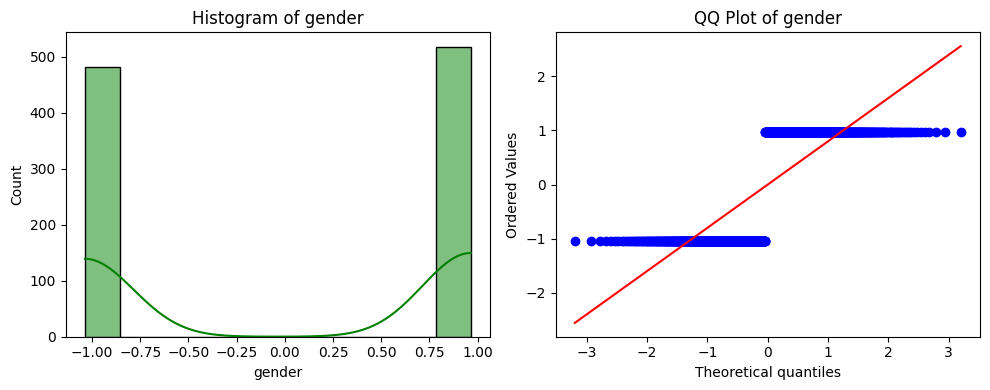

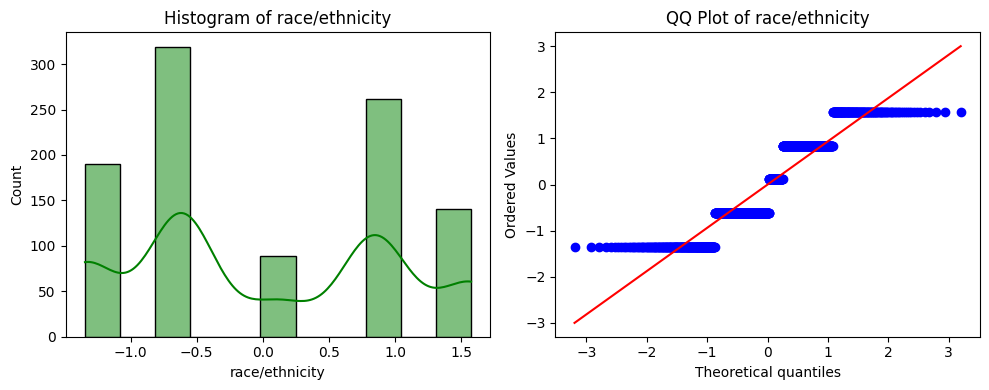

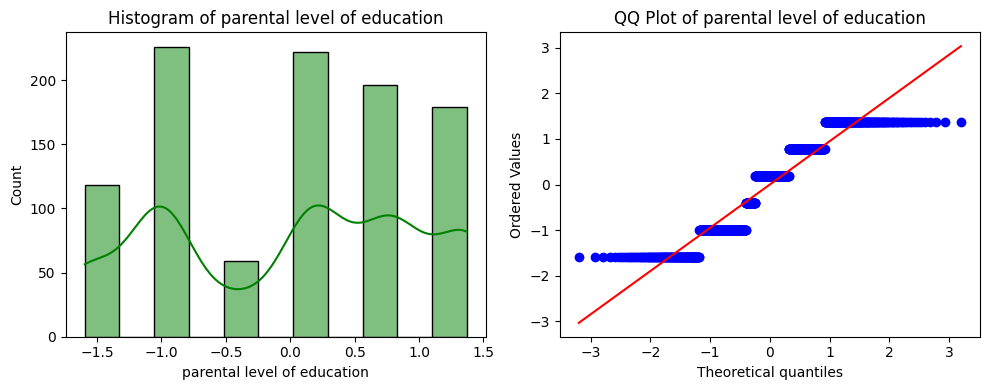

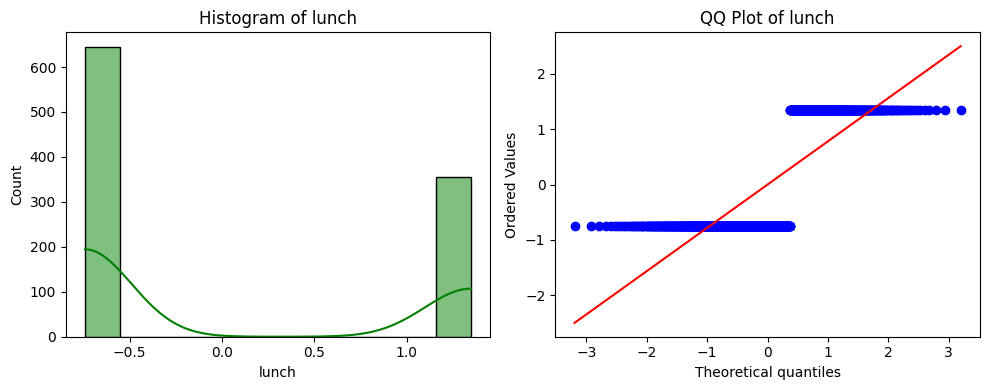

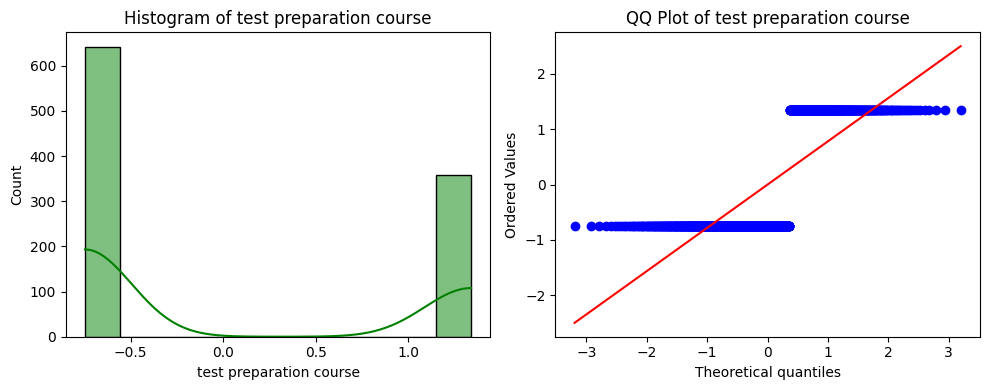

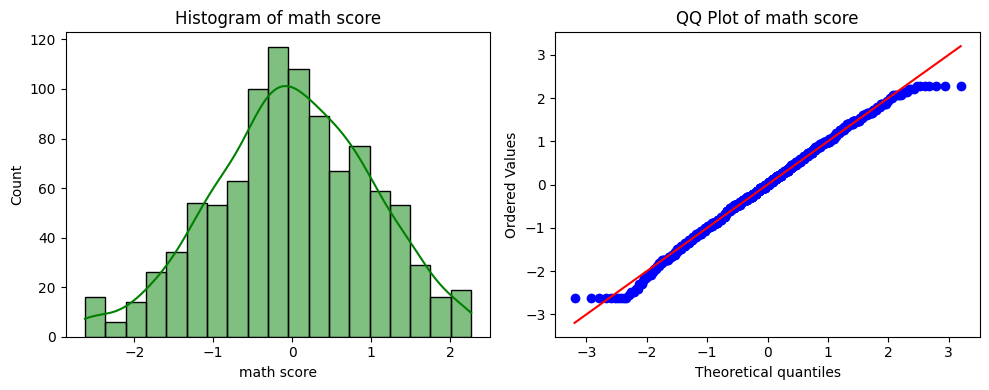

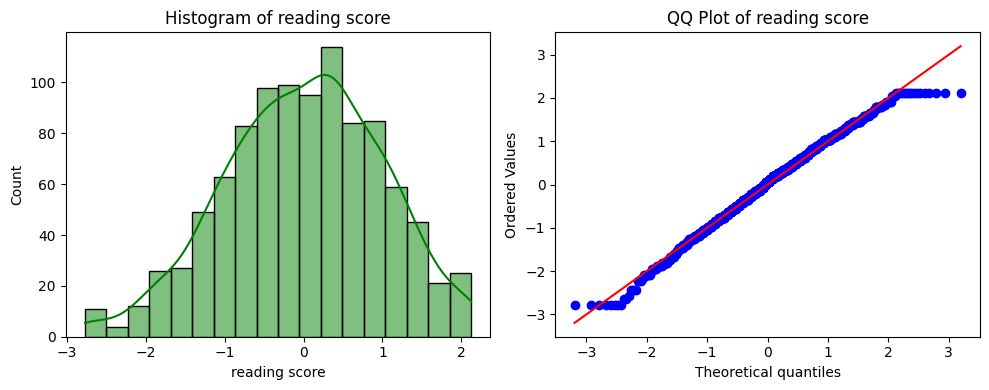

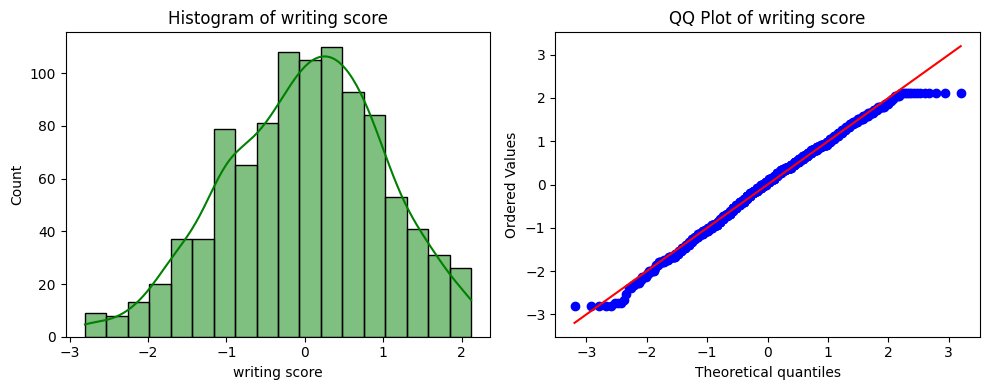

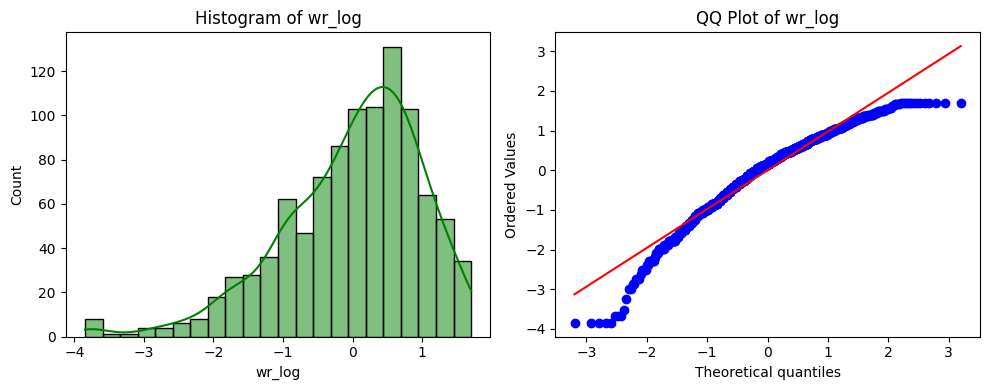

Normality test results for gender:
Shapiro-Wilk test: Statistic=0.6361194418031052, p-value=1.3171533658626982e-41
Kolmogorov-Smirnov test: Statistic=0.35063373364357187, p-value=2.023721714975937e-110

Normality test results for race/ethnicity:
Shapiro-Wilk test: Statistic=0.8725692414468057, p-value=8.635835593586129e-28
Kolmogorov-Smirnov test: Statistic=0.23986080482095373, p-value=4.071624789492042e-51

Normality test results for parental level of education:
Shapiro-Wilk test: Statistic=0.8938892462037301, p-value=1.1193036704787153e-25
Kolmogorov-Smirnov test: Statistic=0.1858735708971434, p-value=1.0228803187962328e-30

Normality test results for lunch:
Shapiro-Wilk test: Statistic=0.6052678033954566, p-value=8.437249052097558e-43
Kolmogorov-Smirnov test: Statistic=0.4159203172493881, p-value=3.713716898082597e-157

Normality test results for test preparation course:
Shapiro-Wilk test: Statistic=0.6065810359172238, p-value=9.449622356762233e-43
Kolmogorov-Smirnov test: Statistic

In [134]:
graphical_norm_check(df_norm_2)
analytical_norm_test(df_norm_2)

Same changes observed.

## Linear regression

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [136]:
target = 'math score'  # or 'reading score' or 'writing score'
X = df.drop(columns=[target])  # Drop target column to form the feature set
y = df[target]  # Target column (math score)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.2)

X_train.shape
y_train.shape

(800,)

In [143]:
model = LinearRegression()
model.fit(X_train, y_train)

for col, coeff in zip(df.columns, model.coef_):
    print (f"{col} : {coeff:.2f}")
print (model.intercept_)

gender : -12.72
race/ethnicity : 0.75
parental level of education : 0.13
lunch : -3.78
test preparation course : -2.80
math score : 0.31
reading score : 0.85
writing score : -13.85
52.64591665767777


In [145]:
y_pred = model.predict(X_test)

In [146]:
# Accuracy of the model
model.score(X_test,y_test)

0.8710273058265595

In [147]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 29.18
RMSE: 5.40
MAE: 4.18
R-squared: 0.87


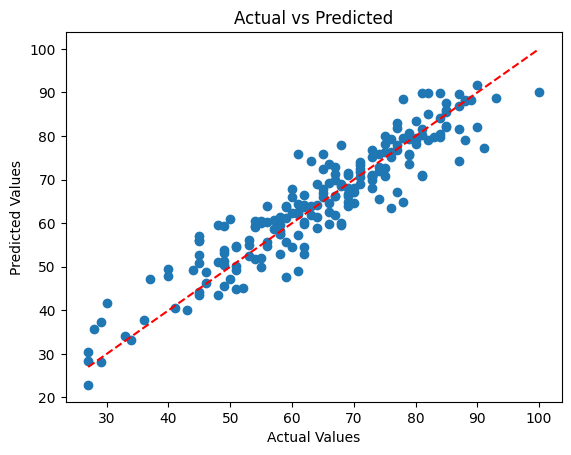

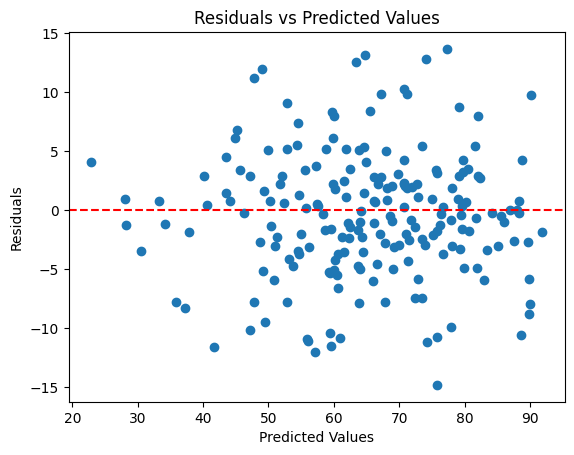

In [149]:
# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')#red)
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values');
plt.show()

# Z-test

Choosing Between Z-test, T-test, and ANOVA
Z-test: Typically used when you have a large sample size (n > 30) and the population standard deviation is known. In most cases, this is less common for practical applications when the population parameters are not known.

T-test: More commonly used when you have a small sample size (n ≤ 30) or when you don't know the population's standard deviation. The t-test is used to compare the means of two groups or to test if a sample mean is significantly different from a known value.

ANOVA (Analysis of Variance): Used when you want to compare the means of three or more groups to see if there are statistically significant differences between them. If you have multiple categories in a feature and you want to compare the means across them, ANOVA is appropriate.

In [152]:
from statsmodels.stats.weightstats import ztest
print (df.columns)

grp1 = df[df['test preparation course'] == 1]['math score']
grp2 = df[df['test preparation course'] == 0]['math score']

z, p = ztest(grp1, grp2)

# Print the results
print(f"Z-statistic: {z}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two groups are not significantly different.")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'wr_log'],
      dtype='object')
Z-statistic: 5.692029799391047
P-value: 1.255379368040018e-08
Reject the null hypothesis: The means of the two groups are significantly different.


In [155]:
from scipy.stats import ttest_ind

# Check the columns
print(df.columns)

# Split the data based on whether the test preparation course was completed (1 = completed, 0 = not completed)
grp1 = df[df['test preparation course'] == 1]['math score']  # Group with test preparation course
grp2 = df[df['test preparation course'] == 0]['math score']  # Group without test preparation course

# Perform the T-test
t, p = ttest_ind(grp1, grp2)

# Print the results
print(f"t-statistic: {t}")
print(f"P-value: {p}")

# Hypothesis testing
if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference in math scores between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in math scores between the two groups.")


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'wr_log'],
      dtype='object')
t-statistic: 5.692029799391047
P-value: 1.6497247446866857e-08
Reject the null hypothesis: There is a significant difference in math scores between the two groups.


In [162]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df.columns = df.columns.str.replace(' ', '_')

df.head()

anova_one_way_score = ols('math_score ~ C(test_preparation_course)', data=df).fit()
anova_table_one_way_score = sm.stats.anova_lm(anova_one_way_score, typ=2)

anova_table_one_way_score

,sum_sq,df,F,PR(>F)
C(test_preparation_course),6994.75489,1.0,32.399203,1.649725e-08
Residual,215461.02011,998.0,NaN,NaN


In [165]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_2_way = ols('math_score ~ C(test_preparation_course) + C(gender) + C(test_preparation_course):C(gender)', data = df).fit()
anova_table_2_way = sm.stats.anova_lm(anova_2_way, typ=2)

anova_table_2_way

,sum_sq,df,F,PR(>F)
C(test_preparation_course),6916.391395,1.0,32.894299,1.289839e-08
C(gender),6035.104042,1.0,28.702904,1.048162e-07
C(test_preparation_course):C(gender),5.862898,1.0,0.027884,8.674160e-01
Residual,209420.053169,996.0,NaN,NaN
